Media por fórmula:
Formula
A    28.6
B    20.2
C    22.4
D    29.8
E    26.0
Name: Fuerza, dtype: float64


C:\Users\$\AppData\Local\Temp\ipykernel_9656\1743784578.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Formula", y="Fuerza", data=df, palette="Set2")


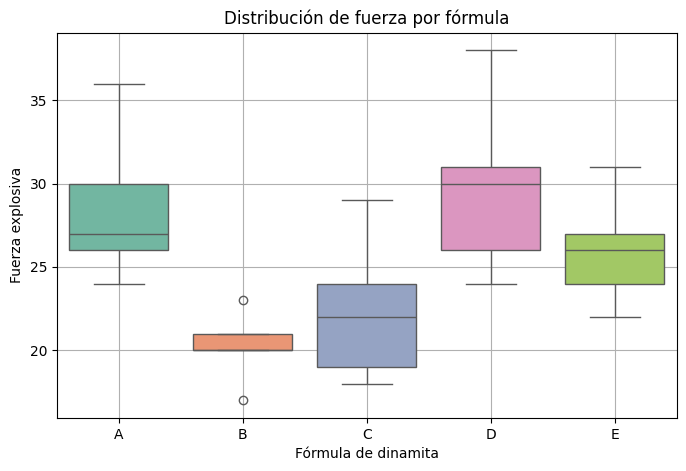

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Datos
data = {
    "Lote": [1]*5 + [2]*5 + [3]*5 + [4]*5 + [5]*5,
    "Operario": [1,2,3,4,5]*5,
    "Formula": [
        'A','B','C','D','E',
        'B','C','D','E','A',
        'C','D','E','A','B',
        'D','E','A','B','C',
        'E','A','B','C','D'
    ],
    "Fuerza": [
        24, 20, 19, 24, 24,
        17, 24, 30, 27, 36,
        18, 38, 26, 27, 21,
        26, 31, 26, 23, 22,
        22, 30, 20, 29, 31
    ]
}

df = pd.DataFrame(data)

# Estadísticas descriptivas por fórmula
print("Media por fórmula:")
print(df.groupby("Formula")["Fuerza"].mean())

# Boxplot para comparar visualmente
plt.figure(figsize=(8, 5))
sns.boxplot(x="Formula", y="Fuerza", data=df, palette="Set2")
plt.title("Distribución de fuerza por fórmula")
plt.xlabel("Fórmula de dinamita")
plt.ylabel("Fuerza explosiva")
plt.grid(True)
plt.show()



En el paso anterior, se realizo la graficacion del cuadro, usando pandas, matplotlib y seaborn como librerias que permiten generar graficos para entender de manera mas facil la informacion

A continuacion una pequeña interpretacion de la informacion y graficacion anteriormente presentada 

D) tiene la mayor media: 29.8

A) también es alta: 28.6

B) es claramente la más baja: 20.2

Hay una diferencia visible de más de 9 unidades entre la mejor y la peor fórmula.

In [2]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Convertir columnas categóricas
df['Lote'] = df['Lote'].astype('category')
df['Operario'] = df['Operario'].astype('category')
df['Formula'] = df['Formula'].astype('category')

# Modelo ANOVA (sin interacciones)
modelo = ols('Fuerza ~ C(Formula) + C(Lote) + C(Operario)', data=df).fit()
anova = sm.stats.anova_lm(modelo, typ=2)  # typ=2 es más adecuado aquí

print(anova)


             sum_sq    df         F    PR(>F)
C(Formula)    330.0   4.0  7.734375  0.002537
C(Lote)        68.0   4.0  1.593750  0.239059
C(Operario)   150.0   4.0  3.515625  0.040373
Residual      128.0  12.0       NaN       NaN


Interpretación final despues de analizar los datos

Fórmula:
Valor-p = 0.0025 < 0.05 → Significativo

Dado los resultados es correcto decir que hay evidencia estadística para rechazar la hipótesis nula.

Conclusión:
Al menos una de las fórmulas tiene un efecto significativamente distinto sobre la fuerza explosiva.

Lote:
Valor-p = 0.2390 > 0.05 → No significativo
No hay evidencia suficiente para decir que los diferentes lotes afectan la fuerza explosiva.

Operario:
Valor-p = 0.0404 < 0.05 → Significativo

Con la informacion suministrada se puede concluir que sí hay evidencia de que la habilidad o experiencia del operario influye en la fuerza explosiva.

Conclusión general:

Para este caso se pueden concluir dos items principales 
1. Que sí existen diferencias significativas entre las fórmulas en cuanto a su efecto sobre la fuerza explosiva.

2. Que también influye el operario, pero no el lote de materia prima.